In [9]:
# All Library Imports
from os import mkdir
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Times New Roman"
# %matplotlib widget
plt.rc("font", size=14,family='serif')

In [2]:
def parse_date(file):
    file = file.split("-")
    day = int(file[0][-3:].strip())
    year = int(file[1].strip())
    return year, day

def read_field(value):
    try:
        return(float(value))
    except:
        return np.nan
        
def save2Folder(data, dirname, filename):
    """Takes data as 3D ndarray, path, and filename
    and saves numpy binary as well as data of each year
    in separate csv file in output directory
    """
    
    output_dir = os.path.realpath(dirname) + "/"
    
    if (not os.path.isdir(output_dir)):
        os.mkdir(output_dir)

    # Save the entire_data as binary
    np.save(output_dir + filename, data)
    for i in range(2007, 2018):
        np.savetxt(output_dir + filename + str(i) + ".csv", data[i-2007], delimiter="\t")
    
    print(f"Files saved to {dirname}")
    
def plotNightDay(data, title):
    """ Takes a 3D ndarray and a string (title) as input
    and plots day and night data as subplots and saves it
    under the name `title`.png in current directory
    
    for data of shape (11, 366, 2)
    Axis 0 - Year
    Axis 1 - DoY
    Axis 3 - Night/Day
    """
    figure = plt.gcf()
    figure.set_size_inches(15, 3)
    plt.tight_layout()
    plt.subplot(211)
    plt.plot(np.ravel(data[:,:,0]), label="DayTime", c='teal')
    plt.legend()
    plt.xticks(np.arange(0, 4040, 366), [])

    plt.subplot(212)
    plt.plot(np.ravel(data[:,:,1]), label="NightTime")
    plt.xticks(np.arange(0, 4040, 366), range(2007, 2019))
    plt.legend()
    
    plt.savefig(title + ".png")

In [18]:
# Path to the data folder
# Please change both of these for each station
# dir = "../stations/BMCL/"
dir = "/media/basu/New Volume/CHLM/"

station_name = "CHLM1"

entire_data = np.zeros((11,366,2))
# First dimension for the years
# Second dim. for the days
# third for day/night time
all_files = glob.iglob(dir + "**/*.Std", recursive=True)

In [19]:
all_files = glob.iglob(dir + "**/*.Std", recursive=True)

for file in all_files:
    year, day = parse_date(file)
    
    if year in range(2007, 2018):
        try:
            df = pd.read_csv(file, sep="\s+", na_values="-", engine="python",
                            converters = {
                                0: None,
                                1: read_field,
                                2: None,
                                3: None
                            })
            vtec = df.iloc[:, 1]

            entire_data[year-2007, day-1, 0] = vtec[300:540].dropna().mean()
            entire_data[year-2007, day-1, 1] = vtec[960:1200].dropna().mean()
        except Exception as e:
            print(file)
            print(e)
    else:
        continue

entire_data[np.isnan(entire_data)] = 0

In [20]:
# Saving the results and plot
output_dir = station_name + " - Averaged/"
try:
    mkdir(output_dir)
except FileExistsError as e:
    pass

# Save the entire_data as binary
np.save(output_dir + station_name, entire_data)
for i in range(2007, 2018):
    np.savetxt(output_dir + str(i) + ".csv", entire_data[i-2007], delimiter="\t")

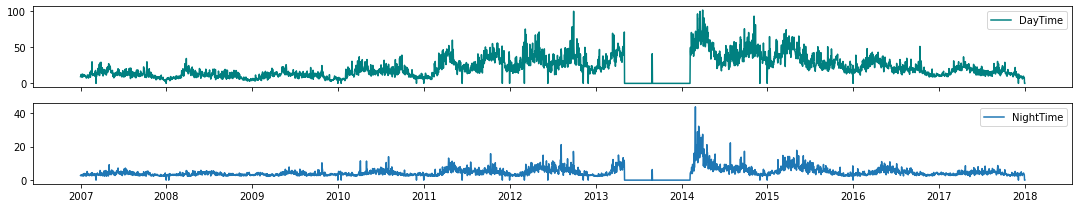

In [21]:
# Separate Day and Night trends
# Generate Plots only
for i, filename in zip([0,1], [" day", " night"]):
    plt.clf()
    plt.xticks(np.arange(0, 4040, 366), range(2007, 2019))
    figure = plt.gcf()
    figure.set_size_inches(15, 3)
    plt.plot(np.ravel(entire_data[:,:,i]))
    plt.savefig(output_dir + station_name + filename + "timeTrend.png")

# Day and Night trends in one figure

figure = plt.gcf()
figure.set_size_inches(15, 3)
plt.tight_layout()
plt.subplot(211)
plt.plot(np.ravel(entire_data[:,:,0]), label="DayTime", c='teal')
plt.legend()
plt.xticks(np.arange(0, 4040, 366), [])

plt.subplot(212)
plt.plot(np.ravel(entire_data[:,:,1]), label="NightTime")
plt.xticks(np.arange(0, 4040, 366), range(2007, 2019))
plt.legend()

plt.savefig(output_dir + station_name + "-daynightTrend.png")

In [24]:
#Load data from three stations 

bmcl = np.load("./CHLM1 - Averaged/CHLM1.npy")
bmcl[np.isnan(bmcl)] = 0

dlpa = np.load("./BMCL - Averaged/BMCL.npy")
dlpa[np.isnan(dlpa)] = 0

jmsm = np.load("./LMJG - Averaged/LMJG.npy")
jmsm[np.isnan(jmsm)] = 0

In [25]:
### Combines data from three statinos

divider = np.zeros((11,366,2))

stations = [jmsm, dlpa, bmcl]
combined = bmcl + dlpa + jmsm
for i in stations:
    divider += np.where(i==0, 0, 1)
    
divider = np.where(divider==0, 1, divider)
combined = combined / divider

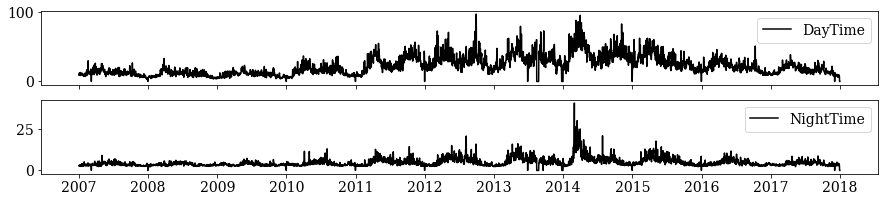

In [26]:
figure = plt.gcf()
figure.set_size_inches(15, 3)
plt.tight_layout()
plt.subplot(211)
plt.plot(np.ravel(combined[:,:,0]), label="DayTime", c='black')
plt.legend()
plt.xticks(np.arange(0, 4040, 366), [])

plt.subplot(212)
plt.plot(np.ravel(combined[:,:,1]), label="NightTime", c="black")
plt.xticks(np.arange(0, 4040, 366), range(2007, 2019))
plt.legend()

plt.savefig("day-night-series.png", dpi=190)

In [27]:
def plotNightDay(data, title):
    figure = plt.gcf()
    figure.set_size_inches(15, 3)
    plt.tight_layout()
    plt.subplot(211)
    plt.plot(np.ravel(data[:,:,0]), label="DayTime", c='teal')
    plt.legend()
    plt.xticks(np.arange(0, 4040, 366), [])

    plt.subplot(212)
    plt.plot(np.ravel(data[:,:,1]), label="NightTime")
    plt.xticks(np.arange(0, 4040, 366), range(2007, 2019))
    plt.legend()
    
    plt.savefig(title + ".png")

In [28]:
# Saving Data

output_dir = "./CHML+BMCL+LMJG/"
try:
    mkdir(output_dir)
except:
    pass

np.save(output_dir + "CHML+BMCL+LMJG", combined)

for i in range(2007, 2018):
    np.savetxt(output_dir + str(i) + ".csv", combined[i-2007], delimiter=",")

## Linear interpolation of missing data

In [29]:
data_flat = combined.ravel()

In [30]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]


def interpolate(y):
    """Returns linear interpolation wherever there is nan in the data
    """
    nans, x= nan_helper(y)
    y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    
    return(y)

data_flat = interpolate(data_flat)
combined = data_flat.reshape((11,366,2))

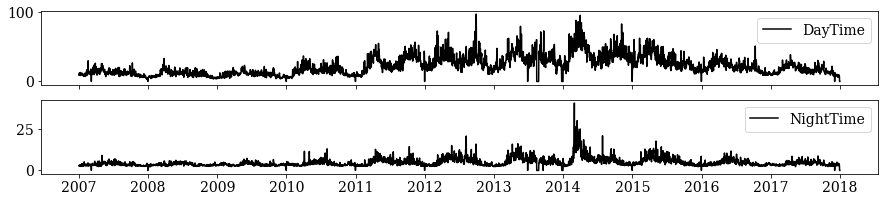

In [31]:
figure = plt.gcf()
figure.set_size_inches(15, 3)
plt.tight_layout()
plt.subplot(211)
plt.plot(np.ravel(combined[:,:,0]), label="DayTime", c='black')
plt.legend()
plt.xticks(np.arange(0, 4040, 366), [])

plt.subplot(212)
plt.plot(np.ravel(combined[:,:,1]), label="NightTime", c="black")
plt.xticks(np.arange(0, 4040, 366), range(2007, 2019))
plt.legend()

plt.savefig("interpolated-day-night-series.png", dpi=190)

### Export as .dat files for MATLAB Use

In [18]:
daytime = combined[:, :, 0]
nighttime = combined[:, :, 1]

np.savetxt("daytime-series.dat", np.ravel(daytime))
np.savetxt("nighttime-series.dat", np.ravel(nighttime))

#### FOR CORRELATION

In [33]:
bmcl_vec = np.ravel(bmcl)
dlpa_vec = np.ravel(dlpa)

In [34]:
# # REmove zero entries
bmcl_vec = np.where(np.logical_or(bmcl_vec == 0, dlpa_vec == 0 ), 0, bmcl_vec)
dlpa_vec = np.where(np.logical_or(bmcl_vec == 0, dlpa_vec == 0 ), 0, dlpa_vec)

# # Remove nan
# bmcl_r = np.where(np.isnan(bmcl_vec), 0, bmcl_vec)
# dlpa_r = np.where(np.isnan(dlpa_vec), 0, dlpa_vec)

# bmcl_r = np.where(np.logical_or(bmcl_vec == 0, dlpa_vec == 0 ), 0, bmcl_vec)
# dlpa_r = np.where(np.logical_or(bmcl_vec == 0, dlpa_vec == 0 ), 0, dlpa_vec)

# shorten vector
dlpa_vec = dlpa_vec[ dlpa_vec != 0]
bmcl_vec = bmcl_vec[ bmcl_vec != 0]
print(dlpa_vec.shape, bmcl_vec.shape)

(5784,) (5784,)


In [35]:
np.corrcoef(dlpa_vec, bmcl_vec)

array([[1.       , 0.9835193],
       [0.9835193, 1.       ]])

In [36]:
from scipy.stats.stats import pearsonr

pearsonr(dlpa_vec, bmcl_vec)

(0.9835193032488276, 0.0)